In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sbpy.photometry import HG1G2

import sys
sys.path.append("/home/bcarry/Documents/softs/ocapy/ssp/")
import ssptools

from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
# Get ephemerides
ephemcc = ssptools.ephemcc(22, '2023-01-01', nbd=200, step='10d', observer='010' )

In [18]:
# Fix parameters
g1 = 0.05
g2 = 0.5

ra0 = np.radians(195)
dec0 = np.radians(-2)
R = 0.7

In [3]:
ephemcc

,Date,LAST,RA,DEC,HA,Az,H,Dobs,Dhelio,VMag,Phase,Elong.,AM,dRAcosDEC,dDEC,RV
0,2459945.5,07:09:14.92,+13:20:18.7813,+05:40:10.227,17.815595,83.994204,1.927042,2.938364,2.995983,12.342237,19.044707,83.790398,20.040248,0.527485,-0.091743,-22.682164
1,2459955.5,07:48:40.55,+13:28:04.0957,+05:23:46.981,18.343459,89.646776,7.447162,2.808619,3.005149,12.252348,19.092459,91.819307,7.320148,0.434633,-0.042507,-22.841495
2,2459965.5,08:28:06.14,+13:34:13.6039,+05:19:31.557,18.897928,95.505470,13.397460,2.679330,3.014181,12.145154,18.740803,100.245747,4.240584,0.325735,0.009195,-22.492818
3,2459975.5,09:07:31.72,+13:38:31.8754,+05:27:43.153,19.483290,101.765016,19.760631,2.553838,3.023072,12.021068,17.935216,109.098120,2.934169,0.201294,0.060586,-21.490539
4,2459985.5,09:46:57.30,+13:40:45.7616,+05:47:52.574,20.103205,108.700810,26.478985,2.435918,3.031814,11.881522,16.638605,118.377932,2.233327,0.064313,0.108590,-19.830007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2461895.5,15:17:18.85,+13:03:47.7920,+07:52:46.214,2.225294,229.046370,43.812740,2.223854,3.107496,11.518579,10.601376,145.460378,1.442780,-0.408293,-0.064101,13.362207
196,2461905.5,15:56:44.42,+12:58:15.4268,+07:29:40.739,2.974720,240.514133,36.866708,2.310645,3.114403,11.701829,13.115353,135.634283,1.663643,-0.293850,-0.129291,17.000466
197,2461915.5,16:36:09.96,+12:54:39.6326,+06:51:47.387,3.691756,249.603943,29.348738,2.416283,3.121082,11.878387,15.218074,126.005697,2.033499,-0.165882,-0.187311,19.969406
198,2461925.5,17:15:35.54,+12:53:08.1020,+06:01:02.614,4.374288,257.053828,21.659642,2.536730,3.127529,12.043604,16.832755,116.765311,2.691535,-0.035256,-0.235997,22.192072


In [4]:
# Dist function
f = 5*np.log10( ephemcc.Dobs * ephemcc.Dhelio ) 

In [5]:
# Phase function
ph = np.radians( ephemcc.Phase )

arg = g1 * HG1G2._phi1(ph) + g2 * HG1G2._phi2(ph) + (1 - g1 - g2) * HG1G2._phi3(ph)
g = -2.5 * np.log10(arg)

In [6]:
# Spin function
coords = SkyCoord( ephemcc.RA, ephemcc.DEC, unit=(u.hourangle, u.deg) )
ra = coords.ra.radian
dec = coords.dec.radian


cosL = np.sin(dec)*np.sin(dec0) + np.cos(dec)*np.cos(dec0)*np.cos(ra-ra0)

s = 2.5*np.log10( 1 - (1-R)*np.abs(cosL) )

Text(0, 0.5, 's($\\alpha,\\delta$)')

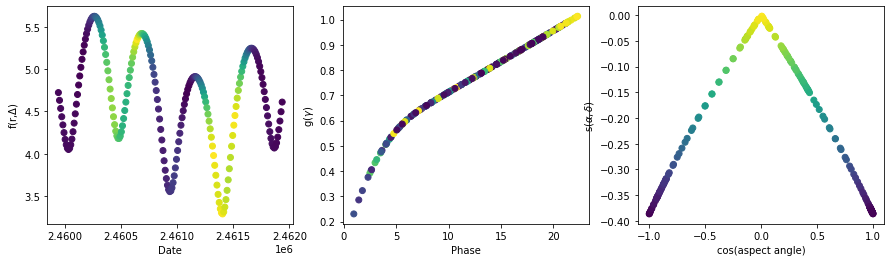

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

# Date
ax[0].scatter( ephemcc.Date, f, c=s )
ax[0].set_xlabel('Date')
ax[0].set_ylabel('f(r,$\Delta$)')

# Phase
ax[1].scatter( ephemcc.Phase, g, c=s )
ax[1].set_xlabel('Phase')
ax[1].set_ylabel('g($\gamma$)')

# Spin
ax[2].scatter( cosL, s, c=s )
ax[2].set_xlabel('cos(aspect angle)')
ax[2].set_ylabel('s($\\alpha,\delta$)')


In [15]:
# Build apparent magnitude
H = 6.6
m = H + f + g + s 

Text(0, 0.5, 'H + g($\\gamma$) + s($\\alpha,\\delta$)')

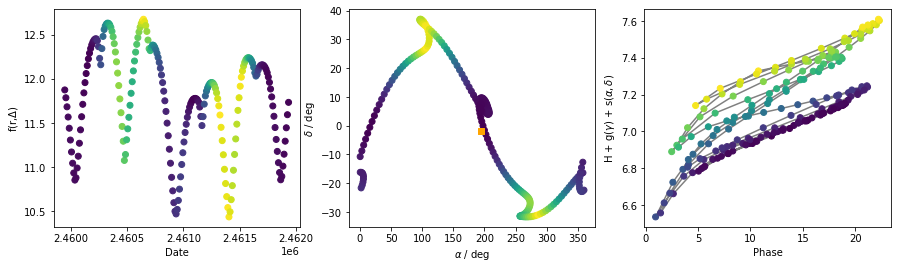

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

# Date
ax[0].scatter( ephemcc.Date, m, c=s )
ax[0].set_xlabel('Date')
ax[0].set_ylabel('f(r,$\Delta$)')

# Celestial sphere
ax[1].scatter( np.degrees(ra), np.degrees(dec), c=s )
ax[1].scatter( np.degrees(ra0), np.degrees(dec0), color='orange', marker='s' )
ax[1].set_xlabel('$\\alpha$ / deg')
ax[1].set_ylabel('$\delta$ / deg')

# 
ax[2].plot( ephemcc.Phase, H+g+s, zorder=-1, color='gray' )
ax[2].scatter( ephemcc.Phase, H+g+s , c=s )
ax[2].set_xlabel('Phase')
ax[2].set_ylabel('H + g($\gamma$) + s($\\alpha,\delta$)')